## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [ ]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

import warnings

#### Import the CSV Data as Pandas DataFrame

In [10]:
df=  pd.read_csv('data/StudentsPerformance.csv')
df.head(
)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### preparing X and Y variables

In [13]:
X = df.drop(columns = ['math score'])
y = df['math score']

In [14]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [16]:
print("categories in gender Variable:     ", end = ' ')
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())


categories in gender Variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [22]:
num_features = X.select_dtypes(exclude = 'object').columns
cat_features = X.select_dtypes(include="object").columns

print(num_features , cat_features)


from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer

numeric_encoder = StandardScaler()
oh_encoder = OneHotEncoder()


preprocessor = ColumnTransformer(
        [
                ("OneHotEncoder", oh_encoder, cat_features),
                ("StandardScaler" , numeric_encoder , num_features)
        ]
)



Index(['reading score', 'writing score'], dtype='object') Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [23]:
X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

In [26]:
##Separate dataset unto train and test
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test  = train_test_split(X,y,test_size = 0.2, random_state = 42)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((800, 19), (200, 19), (800,), (200,))

#### Create an Evaluate Function to give all metrics after model Training

In [28]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models=  {

    "Linear_regression" : LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()

}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model =  list(models.values())[i]
    model.fit(X_train,y_train)

    ##make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i]) 
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')





Linear_regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
-----------------------

## Insights
### we observed that we use train models with dependent and independent variables X and y but
### there is only linear_regression and ridge regression train and test accuracy performs well in both cases so 
### so we  should choose Linear_regression for model_training and predicting a output variable

In [35]:
pd.DataFrame(list(zip(model_list, r2_list)) , columns = ['Model_name' , 'R2_Score']).sort_values(by = ['R2_Score'] , ascending =False) 

,Model_name,R2_Score
2,Ridge,0.880593
0,Linear_regression,0.880433
8,AdaBoost Regressor,0.852339
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.850972
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.778292


### Linear Regression

In [38]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score =  r2_score(y_pred ,y_test)
print("Accuracy of the model :  %2f"  %score )

Accuracy of the model :  0.867044


Text(0, 0.5, 'Predicted')

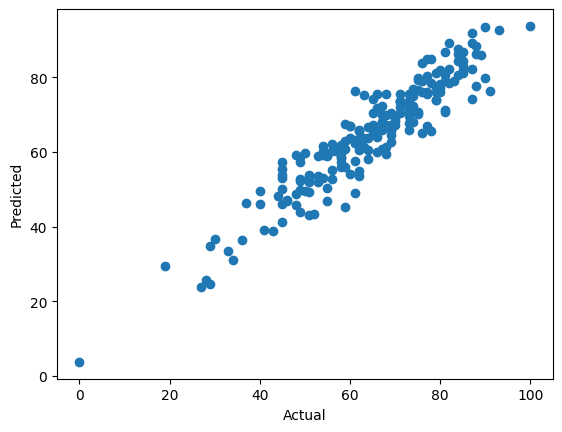

In [39]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

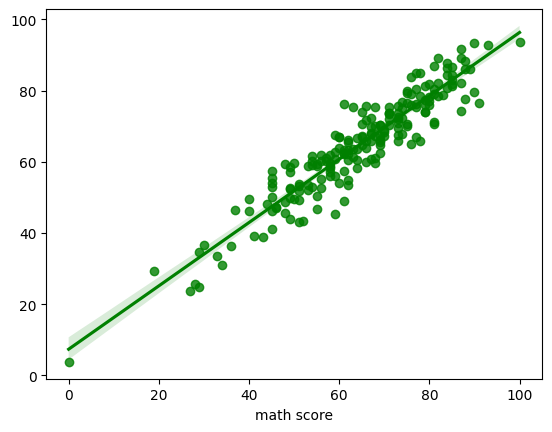

In [40]:
sns.regplot(x = y_test , y = y_pred , color = 'g')

### Difference  between Actual and predicted values


In [41]:
pred_df = pd.DataFrame({'Actal_values':y_test , "predicted_values":y_pred , 'difference':y_test - y_pred})
pred_df

,Actal_values,predicted_values,difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
